In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

In [78]:
audio_directory = '/content/drive/MyDrive/PER/Data/sounds'

whale_sound = "whale_MAY045_channelA_2022-08-19_21-09-46_4948sec.wav"
fichier_audio = audio_directory+"/"+whale_sound

# parrot_sound = "parrot_grazing_MAY042_channelA_2023-02-05_11-17-30_14sec.wav"
# fichier_audio = audio_directory+"/"+parrot_sound

In [79]:
ipd.Audio(fichier_audio)

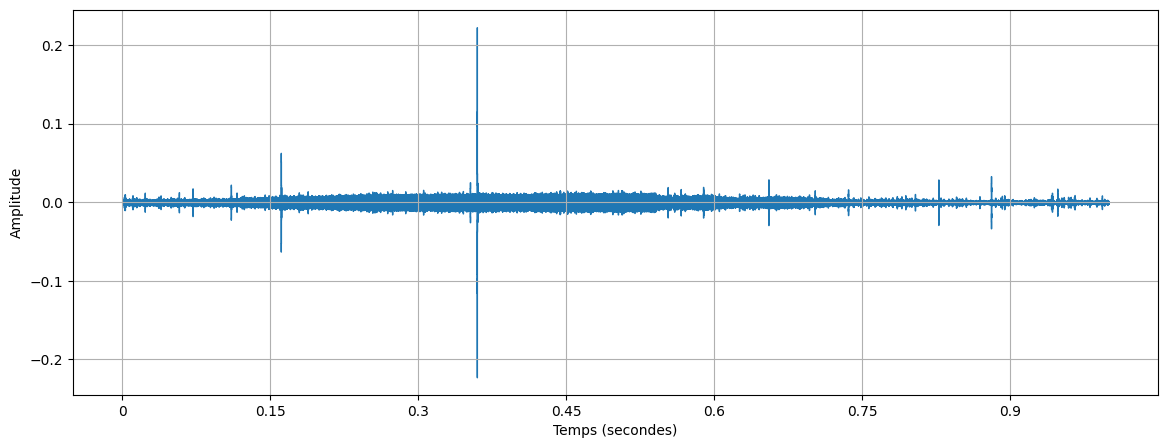

In [80]:
signal, sr = librosa.load(fichier_audio, sr=None)

# Afficher la représentation temporelle
plt.figure(figsize=(14, 5))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

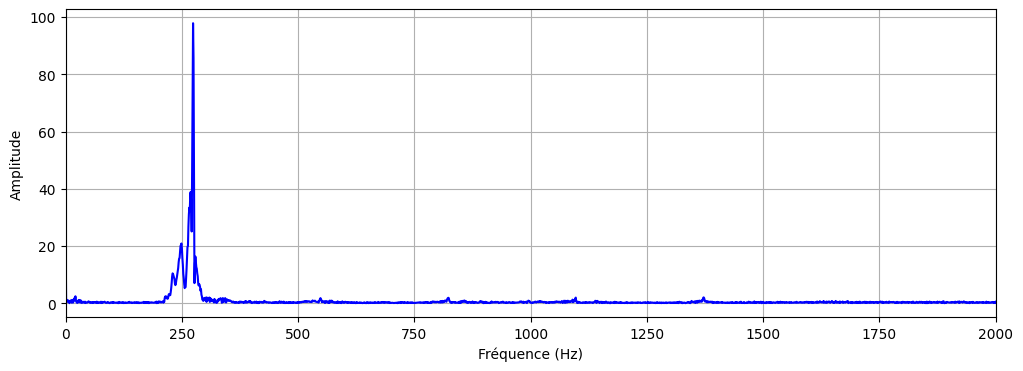

In [90]:
fft = np.fft.fft(signal)
amplitude = np.abs(fft)
frequences = np.fft.fftfreq(len(signal), d=1/sr)

# Filtrer les fréquences positives uniquement
frequences_positives = frequences[:len(frequences)//2]
amplitude_positive = amplitude[:len(amplitude)//2]

# Tracer le graphe
plt.figure(figsize=(12, 4))
plt.plot(frequences_positives, amplitude_positive, color='blue')
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0,2000)
plt.grid(True)
plt.show()

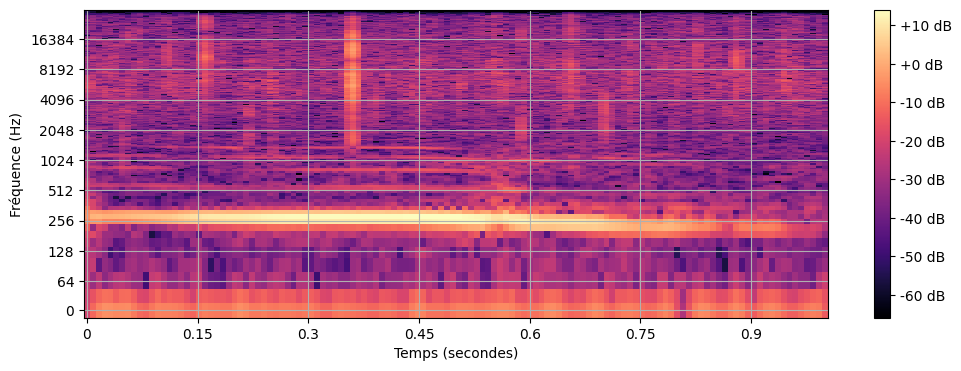

In [91]:
spectre = librosa.stft(signal)
spectre_db = librosa.amplitude_to_db(np.abs(spectre))

plt.figure(figsize=(12, 4))
librosa.display.specshow(spectre_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Temps (secondes)")
plt.ylabel("Fréquence (Hz)")
plt.grid(True)
plt.show()

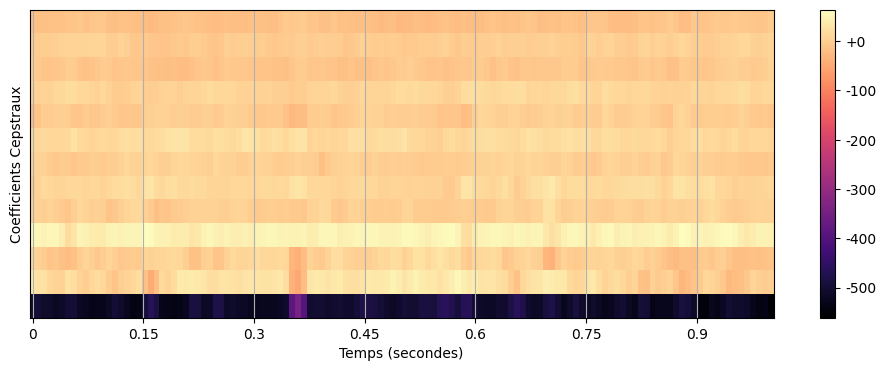

In [100]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr,cmap='magma')
plt.colorbar(format='%+2.0f')
plt.xlabel("Temps (secondes)")
plt.ylabel("Coefficients Cepstraux")
plt.grid(True)
plt.show()

In [77]:
ipd.Audio(fichier_audio)